![CEE Masthead](http://kyrill.ias.sdsmt.edu/wjc/eduresources/CEE_284_Masthead.png)
# Part 5 -- Solving Root Problems in Python

In this exercise we are going to attack two root problems.  One from our homework battery, the other one of our poster child problems (the infamous toilet float example).

The text parts of this exercise also use a lot of LaTeX Equations. An online tool to help with make these equations can be found at this address

[https://www.codecogs.com/latex/eqneditor.php](https://www.codecogs.com/latex/eqneditor.php)



## Libraries

For Here we are going to limit ourselves to as few libraries as possible. These root problems we are going to try to use as few libraries as possible.  The slimmer a script is the better.

* [NumPy](https://docs.scipy.org/doc/numpy/reference/routines.math.html) for some basic math functions
* [SciPy](https://docs.scipy.org/doc/scipy/reference/optimize.html) for optimization
* [SymPy](https://www.sympy.org/en/index.html) for symbolic solutions
* [Matplotlib](https://matplotlib.org) for plotting

In [1]:
################################################
#
# Libraries
#

import numpy             as np
import scipy.optimize    as opt
import sympy             as sym
import matplotlib.pyplot as plt

#
################################################

## Problem 1 : Axial Loads

Let's consider the following familiar problem:

> Looking at off-center axial loads on a column, the secant formula defines the force per unit area, $\frac{P}{A}$, that causes a maximum stress, $\sigma_m$, in a column of given slenderness ratio, $\frac{L}{k}$, where $\frac{ec}{k^2}$ = the eccentricity ratio and E = the modulus of elasticity:

$$ \frac{P}{A} = \frac{\sigma_m}{1 + \frac{ec}{k^2} \sec{\sec{ \left( \frac{L}{2 k}\sqrt{\frac{P}{EA}} \right) } } }  $$
 
> Compute $\frac{P}{A}$ for a steel beam where 
> E = 200,000 MPa, 
> $\frac{ec}{k^2}$ = 0.4, and 
> $\sigma_m$ = 250 MPa, 
> for $\frac{L}{k}$ = 50. 

### Create the Root Function

Let's start by assembling our knowns

* E = 200,000 MPa, 
* $\frac{ec}{k^2}$ = 0.4, and 
* $\sigma_m$ = 250 MPa 
* $\frac{L}{k}$ = 50. 

In [2]:
################################################
#
# Our Constants
#

E     = 200000.  # MPa (using the comments to recall the units)
eck2  =      0.4
sigma =    250.  # MPa
Lk    =     50.

#
################################################

For our formula, $$ \frac{P}{A} = \frac{\sigma_m}{1 + \frac{ec}{k^2} \sec{ \left( \frac{L}{2 k}\sqrt{\frac{P}{EA}} \right) } }  $$

 let's present it as a function but as always, let's present it in "root" form with every term on one side of the equal sign.

$$ f\left(  \frac{P}{A} \right)  = \frac{\sigma_m}{1 + \frac{ec}{k^2} \sec{ \left( \frac{L}{2 k}\sqrt{\frac{P}{EA}} \right) } } - \frac{P}{A} $$

In [3]:
################################################
#
# Our Root Function, f(PA), 
#
#   Note that as with Mathcad, if the parameters were defined
#    defined above, they will be inherite in the equation below.
#

def f(PA) : 
    return ( sigma / ( 1 + eck2 / np.cos( Lk/2 * np.sqrt(PA/E)))  - PA )

#
# However, if you redefine a parameter after defining
#    the function (e.g., Lk) it will update the
#    value in the function, accordingly
#
# Try this and see what happens
#
################################################

### Plotting the Function
Now let's plot the function so we have a feel for the first guesses.

For this we will use the symbolic solving library (SymPy)

-pa + 250.0/(0.4*sec(0.0559016994374947*sqrt(pa)) + 1)

/usr/local/lib/python3.7/site-packages/sympy/plotting/plot.py:1065: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax[i].spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.7/site-packages/sympy/plotting/plot.py:1066: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax[i].spines['bottom'].set_smart_bounds(False)


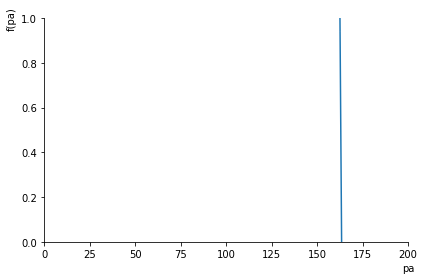

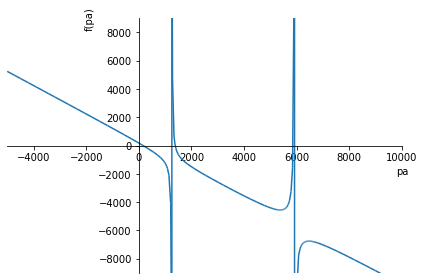

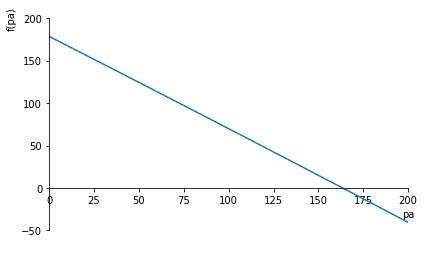

In [4]:
################################################
#
# Use SymPy to plot
#

pa = sym.symbols('pa')

def g(pa) :
    return( sigma / ( 1 + eck2 * sym.sec( Lk/2 * sym.sqrt(pa/E)))  - pa )

display( g(pa) )

sym.plot(g(pa),          # our function
        (pa, 0, 200) )   # our x axis ranges          


sym.plot(g(pa),               # our function
         (pa,-5000,10000),    # our x axis ranges
          ylim=[-9000,9000])  # our y axis ranges


sym.plot(g(pa),               # our function
         (pa, 0,200),         # our x axis ranges
          ylim=[-100,200])    # our y axis ranges


#
################################################

### Solving the System with SciPy's Optimization Routines
From the graph we can guess that our brackets should between 100 and 200. 


#### Fsolve in SciPy's Optimization Tooklit

Let's use their generic function.

In [5]:
################################################
#
# SciPy's FSolve Method
#

first_guess = 100

PA_root_scalar_fsolve = opt.fsolve(f, first_guess)

print()
print(">>> Fsolve")
print(PA_root_scalar_fsolve)

print()
print(">>> Test : f(PA)", f(PA_root_scalar_fsolve))

#
################################################


>>> Fsolve
[163.44290959]

>>> Test : f(PA) [-5.68434189e-14]


#### Classical Root Methods

Here we will use the three methods, Bisecton, a False Position Method and the Secant Method

For Newton's Method, you will need to add an explicit formula for f'. For this one... let's not do that one.  You remember how scary it was.... OK... if you didn't:

In [6]:
################################################
#
# Why we aren't using Newton's Method
#

display( pa - g(pa) / sym.diff(g(pa), pa) )

#
# "Let's not..."
#
################################################

pa - (-pa + 250.0/(0.4*sec(0.0559016994374947*sqrt(pa)) + 1))/(-1 - 2.79508497187474*tan(0.0559016994374947*sqrt(pa))*sec(0.0559016994374947*sqrt(pa))/(sqrt(pa)*(0.4*sec(0.0559016994374947*sqrt(pa)) + 1)**2))

... so let's just use the ones that don't need the derivative.  The next example *will* have a pretty easy derivative with which to work.

In [7]:
################################################
#
# SciPy's Bisection Method
#

PA_root_scalar_bisect = opt.root_scalar(f, 
                                        bracket = [100, 200], 
                                        method  = 'bisect')

print()
print(">>> Bisection Method")
print(PA_root_scalar_bisect)

print()
print(">>> Test : f(PA)", f(PA_root_scalar_bisect.root))

#
################################################


>>> Bisection Method
      converged: True
           flag: 'converged'
 function_calls: 48
     iterations: 46
           root: 163.4429095899705

>>> Test : f(PA) 1.1368683772161603e-13


In [8]:
################################################
#
# SciPy's False-Position Method with Brent-Q
#

PA_root_scalar_brentq = opt.root_scalar(f, 
                                        bracket = [100, 200], 
                                        method  = 'brentq')

print()
print(">>> False-Position with Brent-Q")
print(PA_root_scalar_brentq)

print()
print(">>> Test : f(PA)", f(PA_root_scalar_brentq.root))
#
################################################


>>> False-Position with Brent-Q
      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 163.4429095899706

>>> Test : f(PA) -2.842170943040401e-14


In [9]:
################################################
#
# SciPy's Secant Method
#

PA_root_scalar_secant= opt.root_scalar(f, 
                                       x0     = 100, 
                                       x1     = 200, 
                                       method = 'secant')

print()
print(">>> Secant Method")
print(PA_root_scalar_secant)

print()
print(">>> Test : f(PA)", f(PA_root_scalar_secant.root))


#
################################################


>>> Secant Method
      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 163.4429095899706

>>> Test : f(PA) -2.842170943040401e-14


## Problem 2 : The Floating Ball Problem
You have a small spherical buoy (we won’t ask what it’s for) with a diameter, *d*, of 11 cm and mass, *m*, of 418 g. (You're on Earth, so acceleration due to gravity, *g* is 980.665 m s$^{-1}$)

When immersed in water (which has a density, $\rho_w$, of 1 g cm$^{-3}$) what is it’s displacement (draft), *h*?

For this, use Archimedes Principle from Physics Class in which,

*  The Buoyant Force = The Weight of the Object, and 
*  The Displaced Volume of Fluid = the Volume of Submerged Mass). 

For this our formulae are 

$$F_{object} = F_{buoyancy}$$
$$F_{object} = m  g $$
$$F_{buoyancy} = g \rho_w V_{disp}$$
$$V_{disp}(h) = \frac{\pi h^2}{3} \left(  3r-h  \right)$$





### Initial Attack and Problem Setup

This one is a little different because we are deriving our root equation from first principles.

We can start by pen-and-paperwork to make our root equation, *f*(*h*)... I'm doing the results here in the notebook using the formulas from above

$$F_{object} = F_{buoyancy}$$
$$ m g  = g \rho_w V_{disp}$$
$$ m g  = g \rho_w \frac{\pi h^2}{3} \left(  3r-h  \right)$$
$$ m  =  \frac{ \rho_w \pi}{3}  h^2 \left(  3r-h  \right)$$
$$ f(h) = \frac{ \rho_w \pi}{3}  h^2 \left(  3r-h  \right) - m$$


Then we create our known variables.  We are grounded here in the cgs units system.

In [10]:
################################################################
#
# Known Variables
#
#   Physical Constants
#

g   = 980.665 # m s-2  # notice with the algebra, we don't really need this!
rho =   1.0   # g cm-3 # despite it being 1.0 we still will need this one of we change the fluid properties

#
#   Parameters for Buoy 
#

m   = 418.0   # g
d   =  11.0   # cm
r   =  d/2    # cm

#
################################################################

Now let's make our formulas.  As before we can do these for both SciPy and SymPy.

We'll start with SymPy

In [11]:
################################################################
#
# Our Root Equation f(h) for SymPy
#

h = sym.symbols("h")

def f(h) : 
    return(rho * np.pi / 3 * h**2 * (3*r - h) - m)

display("g(h) = ",f(h))


#
# remember the symplify and expand arrow modifiers in Mathcad?
#

display("g(h) = ",sym.expand(f(h)))

#
################################################################

'g(h) = '

1.0471975511966*h**2*(16.5 - h) - 418.0

'g(h) = '

-1.0471975511966*h**3 + 17.2787595947439*h**2 - 418.0

Which we see is a cubic solution.  This is a polynoial and an "algebraic" equation and is relatively hastle-free so long as our roots aren't imaginary.  With this we can use a symbolic solver

### Plotting our Function

But let's first plot things out ...

...  and we know that the draft on the ball can only go from its bottom (*h* = 0) to its top (*h* = *d*)

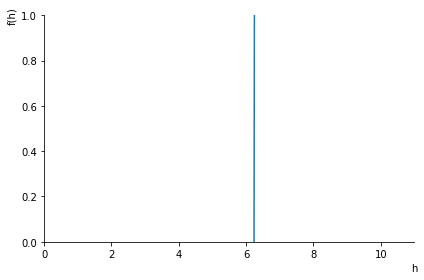

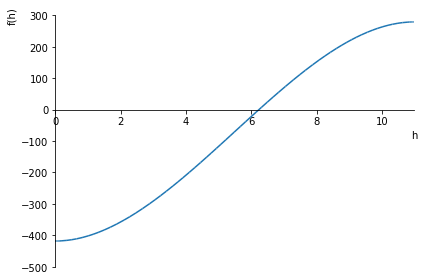

In [12]:
################################################
#
# Use SymPy to plot
#

sym.plot(f(h),      # our function
         (h,0,d) )  # our x axis ranges


sym.plot(f(h),      # our function
         (h,0,d),   # our x axis ranges
         ylim = [-500,300] )   # our x axis ranges



#
################################################

So we can eyeball a pair of brackets between 6 and 8 cm

### Solving the Root with SymPy's Solver Routines

Now let's play with our solvers starting this time with our symbolic ones (the eaier problem was messy so we passed on this).  The safest one to use us normally [solveset](https://docs.sympy.org/latest/modules/solvers/solveset.html) and works like this

In [13]:
################################################
#
# SymPy's Symbolic Solver with Solveset
#

root_solveset_h = sym.solveset(f(h), h)

print(root_solveset_h)

#
################################################

FiniteSet(-4.37301748153818, 6.23619394816947, 14.6368235333687)


So here it gives is three roots and we now based on our known physical limits of our problem that our results must be between 0 and 11 cm.  That leaves the 6.2 cm solution to be our answer.

### Solving the Root with SciPy's Basic Root Optimization Schemes

Again, let's use the [fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html#scipy.optimize.fsolve) function


In [14]:
################################################
#
# SciPy's FSolve Method
#

first_guess = 6.

h_root_scalar_fsolve = opt.fsolve(f, first_guess)

print()
print(">>> Fsolve")
print(h_root_scalar_fsolve)

print()
print(">>> Test : f(h)", f(h_root_scalar_fsolve))

#
################################################


>>> Fsolve
[6.23619395]

>>> Test : f(h) [-1.13686838e-13]


### Solving the Root with SciPy's Classic Optimization Routines

Now we can use our three basic solvers (Bisection, False-Position, and Secant)

In [15]:
################################################
#
# SciPy's Bisection Method
#

h_root_scalar_bisect = opt.root_scalar(f, 
                                        bracket = [6, 8], 
                                        method  = 'bisect')

print()
print(">>> False-Position with Bisection")
print(h_root_scalar_bisect)

print()
print(">>> Test : f(h)", f(h_root_scalar_bisect.root))

#
################################################


>>> False-Position with Bisection
      converged: True
           flag: 'converged'
 function_calls: 42
     iterations: 40
           root: 6.236193948168875

>>> Test : f(h) -5.5706550483591855e-11


In [16]:
################################################
#
# SciPy's False-Position Method with Brent-Q
#

h_root_scalar_brentq = opt.root_scalar(f, 
                                        bracket = [6, 8], 
                                        method  = 'brentq')

print()
print(">>> False-Position with Brent-Q")
print(h_root_scalar_brentq)

print()
print(">>> Test : f(h)", f(h_root_scalar_brentq.root))
#
################################################


>>> False-Position with Brent-Q
      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 6.236193948169484

>>> Test : f(h) 1.1937117960769683e-12


In [17]:
################################################
#
# SciPy's Secant Method
#

h_root_scalar_secant= opt.root_scalar(f, 
                                       x0     = 6, 
                                       x1     = 8, 
                                       method = 'secant')

print()
print(">>> Secant Method")
print(h_root_scalar_secant)

print()
print(">>> Test : f(h)", f(h_root_scalar_secant.root))


#
################################################


>>> Secant Method
      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 6.236193948169473

>>> Test : f(h) 1.7053025658242404e-13


Finally we can now do a demonstration of Newton-Raphson.  This is a little more complex since we will need to calculate a derivative and it's not as seamless as with Mathcad.  

Here we will need to do it in three steps

In [18]:
#################################################################
#
# SciPy's Newton-Raphson Method Part 1
#
# First get our first derivative of f(h)
#

display("f'(h) = ",sym.expand( sym.diff(f(h), h) ))

print(  "f'(h) = ",sym.expand( sym.diff(f(h), h) ))

#
################################################################

"f'(h) = "

-3.14159265358979*h**2 + 34.5575191894877*h

f'(h) =  -3.14159265358979*h**2 + 34.5575191894877*h


In [19]:
################################################################
#
# SciPy's Newton-Raphson Method Part 2
#
# cut-n-paste the derivative formula above into a new function
#

def f_prime(h):
    return( -3.14159265358979 * h**2 + 34.5575191894877 * h )

display("f(h)  = ",       f(h))
display("f'(h) = ", f_prime(h))

#
################################################################

'f(h)  = '

1.0471975511966*h**2*(16.5 - h) - 418.0

"f'(h) = "

-3.14159265358979*h**2 + 34.5575191894877*h

In [20]:
################################################################
#
# SciPy's Newton-Raphson Method Part 3
#
# Now as in the earlier cases just run the root_scalar function
#

h_root_scalar_newton = opt.root_scalar(f, 
                                       x0     = 6, 
                                       fprime = f_prime, 
                                       method = 'newton')

print()
print(">>> Newton-Raphson Method")
print(h_root_scalar_newton)

print()
print(">>> Test : f(h)", f(h_root_scalar_newton.root))

#
################################################################


>>> Newton-Raphson Method
      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 4
           root: 6.236193948169471

>>> Test : f(h) -1.1368683772161603e-13


## Version Information

In [21]:
################################################################
#
# Loading Version Information
#

%load_ext version_information

%version_information version_information, numpy, matplotlib, scipy, sympy

#
################################################################

Software versions
Python 3.7.7 64bit [Clang 11.0.0 (clang-1100.0.33.17)]
IPython 7.13.0
OS Darwin 19.4.0 x86_64 i386 64bit
version_information 1.0.3
numpy 1.18.2
matplotlib 3.2.1
scipy 1.4.1
sympy 1.5.1
Mon Apr 20 20:43:00 2020 MDT